# **Heart Disease Prediction**


*  Problem Statment
*  Dataset description

*   Importing the dependinces


*  Data Cleaning and Preproccesing
*  Exploratey data analysis (EDA)

*   Feature Enginering
*   Modeling

*   Model validation










## **Problem Statment**
### The major task on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## **Dataset Descriptions**


1.   **id** (Unique id for each patient)
1.   **age** (Age of the patient in years)
1.   **dataset** (place of study)
1.   **sex** (Male/Female)
1.   **cp chest pain type** ([typical angina, atypical angina, non-anginal, asymptomatic])
2.   **trestbps resting blood pressure** (resting blood pressure (in mm Hg on admission to the hospital))
2.   **chol** (serum cholesterol in mg/dl)
2.   **fbs** (if fasting blood sugar > 120 mg/dl)
2.   **restecg** (resting electrocardiographic results)-- Values: [normal, stt abnormality, lv hypertrophy]
2.   **thalach**: maximum heart rate achieved
1.   **exang**: exercise-induced angina (True/ False)
2.   **oldpeak**: ST depression induced by exercise relative to rest
1.   **slope**: the slope of the peak exercise ST segment
1.   **ca**: number of major vessels (0-3) colored by fluoroscopy
2.   **thal**: [normal; fixed defect; reversible defect]
2.   **num**: the predicted attribute







## **Importing the dependinces**

In [ ]:
# for manipulation
import numpy as np
import pandas as pd

# for replacing missing values
from sklearn.impute import SimpleImputer

# to use z-score method for handling outliers
from scipy import stats

# for the visualization
import seaborn as sns
import matplotlib.pyplot as plt

#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# for Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
# read the dataset
df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# statistical measures
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## **Data Cleaning and Preproccesing**

In [ ]:
# checking for missing values
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
# replacing misiing values using SimpleImputer

# Define columns with missing values
columns_with_missing = ['trestbps', 'chol', 'thalch', 'oldpeak']

# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the columns with missing values
imputer.fit(df[columns_with_missing])

# Transform and replace missing values in the dataframe
df[columns_with_missing] = imputer.transform(df[columns_with_missing])

In [ ]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
# detrmine the Categorical columns
categorical_col = df.select_dtypes(exclude = 'number').columns
categorical_col

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [ ]:
df[categorical_col].isnull().sum()

sex          0
dataset      0
cp           0
fbs         90
restecg      2
exang       55
slope      309
thal       486
dtype: int64

In [ ]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [ ]:
# Define columns with categorical variables
categorical_cols = ['fbs', 'restecg', 'exang', 'slope']

# Initialize SimpleImputer with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the data
imputer.fit(df[categorical_cols])

# Transform the data
df[categorical_cols] = imputer.transform(df[categorical_cols])

In [ ]:
# checking the features that have more that 50% of missing values

Records_num = df.shape[0]
drop_col=[]
for val in df:
    missing_cells = df[val].isnull().sum()
    percent = (missing_cells.sum() / Records_num) * 100
    if percent >= 50 :
        drop_col.append(val)
        print(f'the missing values percent in Col {val} ----> {percent.round()} ')

print(drop_col)

the missing values percent in Col ca ----> 66.0 
the missing values percent in Col thal ----> 53.0 
['ca', 'thal']


In [ ]:
# drop these column from the data frame and the id col and dataset col
df.drop(columns=['ca', 'thal', 'id', 'dataset'], inplace=True)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [ ]:
# Calculate the number of duplicates
num_duplicates = df.duplicated().sum()

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)

Number of duplicates: 2


In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    918 non-null    float64
 8   exang     918 non-null    object 
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    object 
 11  num       918 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 93.2+ KB


### **Check if there outliers**

In [ ]:
# detrmine the numerical columns
numerical_col = df.select_dtypes(include = 'number').columns
numerical_col

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

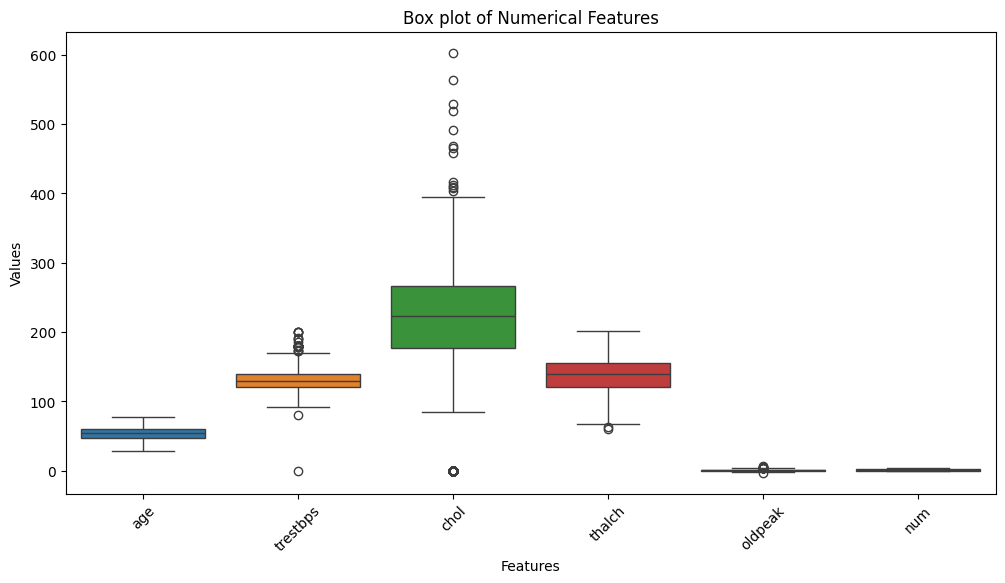

In [ ]:
# Create box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_col])
plt.title('Box plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Removing the Outliers using Z-Score method

# Calculate Z-scores for each numerical feature
z_scores = stats.zscore(df[numerical_col])

# Define threshold for outliers
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]

# Print the shape of the DataFrame before and after removing outliers
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Shape before removing outliers: (918, 12)
Shape after removing outliers: (899, 12)


## **EDA**

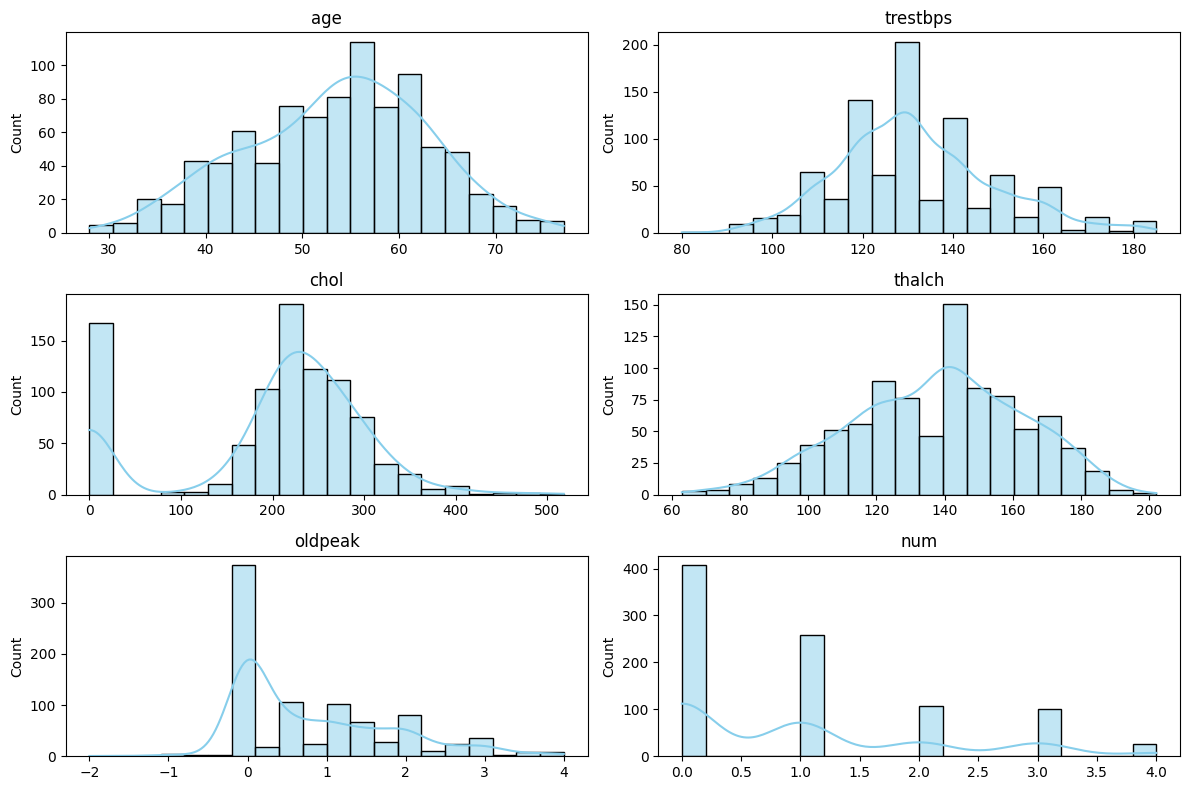

In [ ]:
# Plot histograms for numerical columns for the data after removing outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_col, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_no_outliers[col], kde=True, color='skyblue', bins=20)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

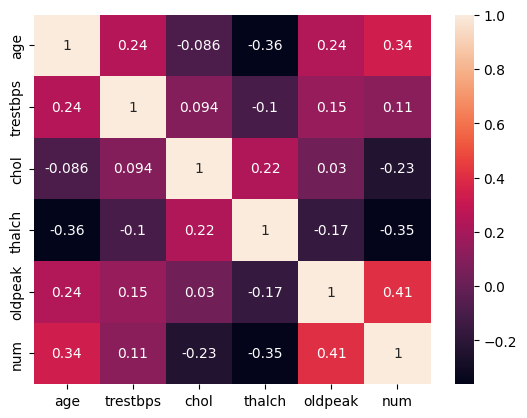

In [ ]:
corr = df_no_outliers.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True)
plt.show()

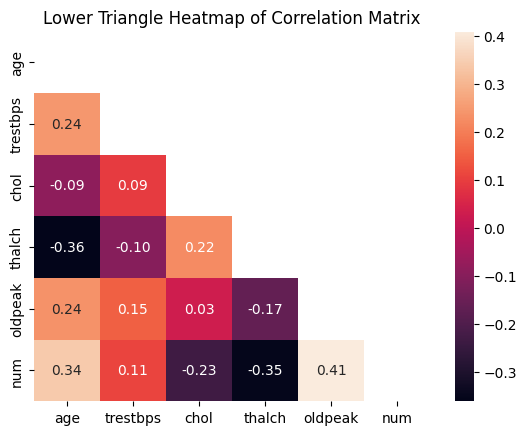

In [ ]:
# Calculate correlation matrix
corr = df_no_outliers.select_dtypes(include=['number']).corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap with the mask
sns.heatmap(corr, annot=True, mask=mask, fmt=".2f")
plt.title('Lower Triangle Heatmap of Correlation Matrix')
plt.show()

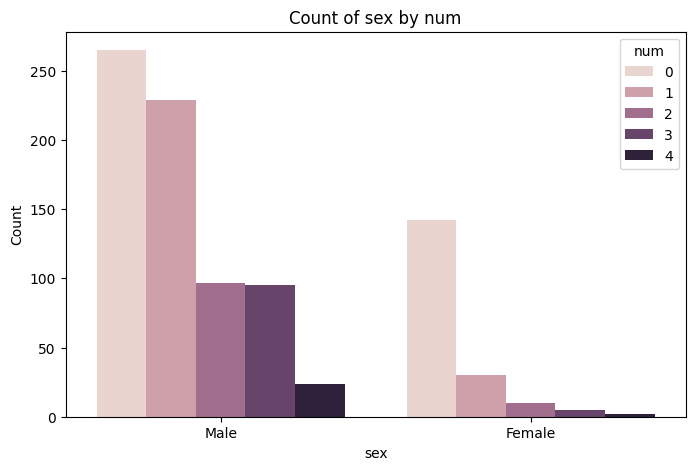

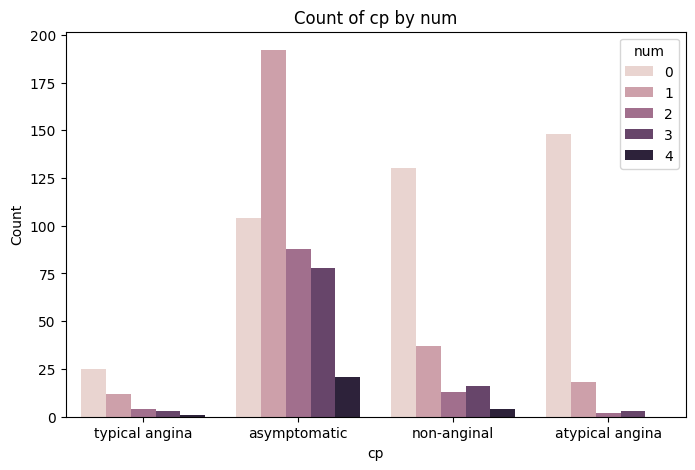

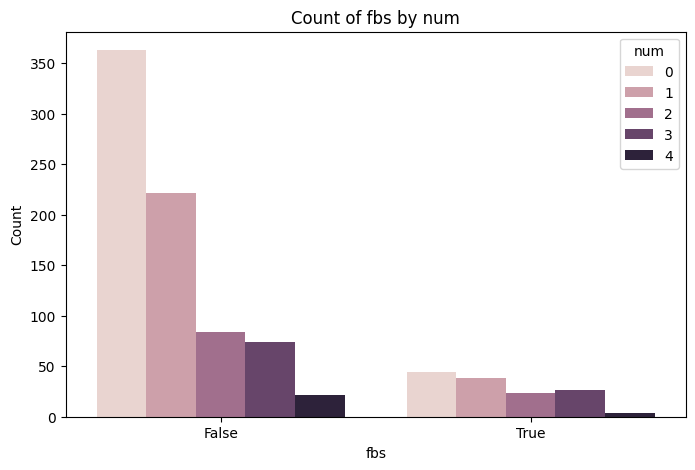

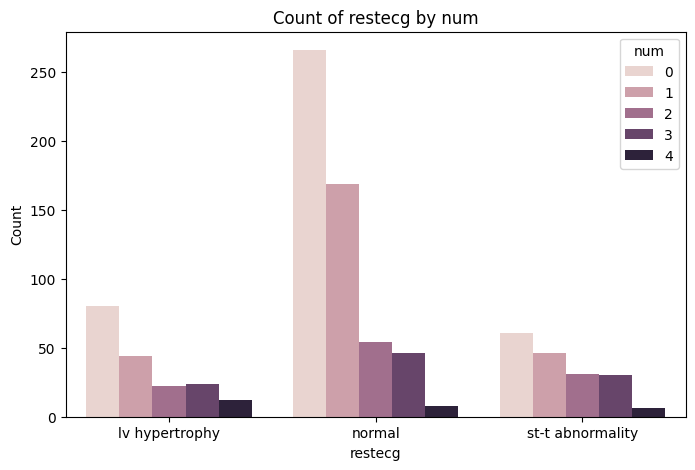

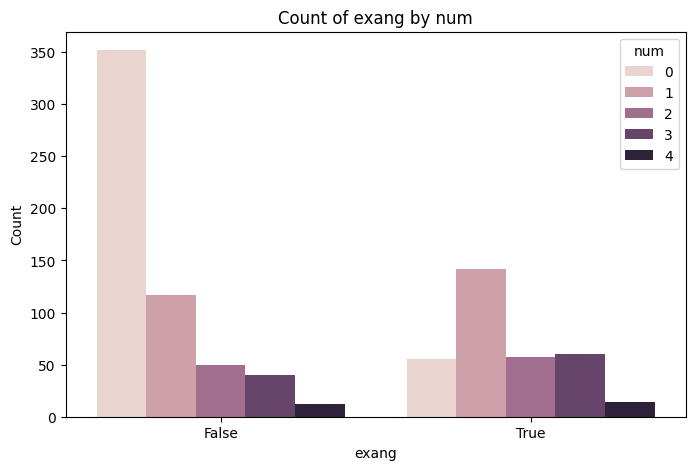

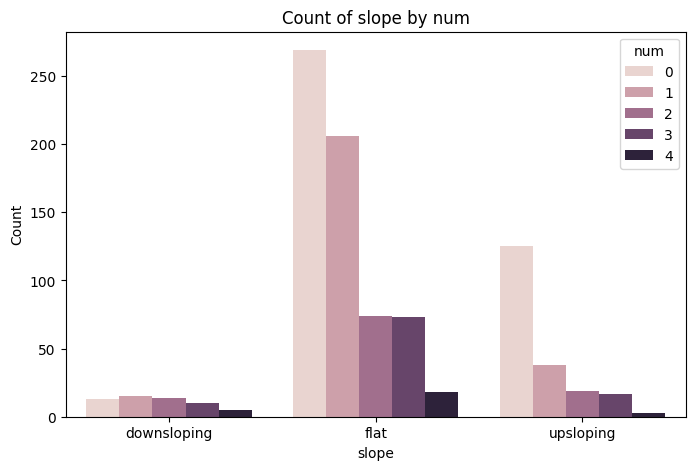

In [ ]:
# Categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_no_outliers, x=feature, hue='num')
    plt.title(f'Count of {feature} by num')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='num')
    plt.show()

📈 The most percentage of people who

1.   have the avaliabilty to has hear disese which **chest pain type** equals **asymptomatic**
2.   List item



## **Encoding**

In [ ]:
df_copy = df_no_outliers.copy()
df_copy

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,1
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,2
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0


In [ ]:
sex_encoder = OneHotEncoder(handle_unknown='ignore')

enc_data = pd.DataFrame(sex_encoder.fit_transform(df_copy[['sex']]).toarray(), columns = 'sex'+'_'+sex_encoder.categories_[0])
df_copy = pd.concat([df_copy.reset_index(drop=True), enc_data.reset_index(drop=True)], axis=1)
df_copy.drop(columns='sex', inplace=True)

In [ ]:
cp_encoder = OneHotEncoder(handle_unknown='ignore')

enc_data = pd.DataFrame(cp_encoder.fit_transform(df_copy[['cp']]).toarray(), columns = 'cp'+'_'+cp_encoder.categories_[0])
df_copy = pd.concat([df_copy.reset_index(drop=True), enc_data.reset_index(drop=True)], axis=1)
df_copy.drop(columns='cp', inplace=True)

In [ ]:
df_copy.shape

(899, 16)

In [ ]:
df_copy.head()

,age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0,0.0,1.0,0.0,0.0,0.0,1.0
1,67,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2,0.0,1.0,1.0,0.0,0.0,0.0
2,67,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1,0.0,1.0,1.0,0.0,0.0,0.0
3,37,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0,0.0,1.0,0.0,0.0,1.0,0.0
4,41,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# fbs_encoder = OneHotEncoder(handle_unknown='ignore')

# enc_data = pd.DataFrame(fbs_encoder.fit_transform(df_copy[['fbs']]).toarray(), columns = 'fbs'+'_'+fbs_encoder.categories_[0])
# df_copy = pd.concat([df_copy.reset_index(drop=True), enc_data.reset_index(drop=True)], axis=1)
# df_copy.drop(columns='fbs', inplace=True)

fbs_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the encoder on the 'fbs' column
enc_data = fbs_encoder.fit_transform(df_copy[['fbs']])

# Convert the encoded columns to a DataFrame
enc_df = pd.DataFrame(enc_data.toarray(), columns=['fbs_' + str(category) for category in fbs_encoder.categories_[0]])

# Concatenate the encoded DataFrame with the original DataFrame
df_copy = pd.concat([df_copy.reset_index(drop=True), enc_df.reset_index(drop=True)], axis=1)

# Drop the original 'fbs' column
df_copy.drop(columns='fbs', inplace=True)

In [ ]:
df_copy.shape

(899, 17)

In [ ]:
df_copy.head()

,age,trestbps,chol,restecg,thalch,exang,oldpeak,slope,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True
0,63,145.0,233.0,lv hypertrophy,150.0,False,2.3,downsloping,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,67,160.0,286.0,lv hypertrophy,108.0,True,1.5,flat,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,67,120.0,229.0,lv hypertrophy,129.0,True,2.6,flat,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,37,130.0,250.0,normal,187.0,False,3.5,downsloping,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,41,130.0,204.0,lv hypertrophy,172.0,False,1.4,upsloping,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
restecg_encoder = OneHotEncoder(handle_unknown='ignore')

enc_data = pd.DataFrame(restecg_encoder.fit_transform(df_copy[['restecg']]).toarray(), columns = 'restecg'+'_'+restecg_encoder.categories_[0])
df_copy = pd.concat([df_copy.reset_index(drop=True), enc_data.reset_index(drop=True)], axis=1)
df_copy.drop(columns='restecg', inplace=True)

In [ ]:
df_copy.shape

(899, 19)

In [ ]:
exang_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the encoder on the 'exang' column
enc_data = exang_encoder.fit_transform(df_copy[['exang']])

# Convert the encoded columns to a DataFrame
enc_df = pd.DataFrame(enc_data.toarray(), columns=['exang_' + str(category) for category in exang_encoder.categories_[0]])

# Concatenate the encoded DataFrame with the original DataFrame
df_copy = pd.concat([df_copy.reset_index(drop=True), enc_df.reset_index(drop=True)], axis=1)

# Drop the original 'exang' column
df_copy.drop(columns='exang', inplace=True)

In [ ]:
df_copy.shape

(899, 20)

In [ ]:
slope_encoder = OneHotEncoder(handle_unknown='ignore')

enc_data = pd.DataFrame(slope_encoder.fit_transform(df_copy[['slope']]).toarray(), columns = 'slope'+'_'+slope_encoder.categories_[0])
df_copy = pd.concat([df_copy.reset_index(drop=True), enc_data.reset_index(drop=True)], axis=1)
df_copy.drop(columns='slope', inplace=True)

In [ ]:
df_copy

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping
0,63,145.0,233.0,150.0,2.3,0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,67,160.0,286.0,108.0,1.5,2,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,67,120.0,229.0,129.0,2.6,1,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,37,130.0,250.0,187.0,3.5,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,41,130.0,204.0,172.0,1.4,0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,54,127.0,333.0,154.0,0.0,1,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
895,62,130.0,139.0,140.0,0.5,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
896,55,122.0,223.0,100.0,0.0,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
897,58,130.0,385.0,140.0,0.5,0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       899 non-null    int64  
 1   trestbps                  899 non-null    float64
 2   chol                      899 non-null    float64
 3   thalch                    899 non-null    float64
 4   oldpeak                   899 non-null    float64
 5   num                       899 non-null    int64  
 6   sex_Female                899 non-null    float64
 7   sex_Male                  899 non-null    float64
 8   cp_asymptomatic           899 non-null    float64
 9   cp_atypical angina        899 non-null    float64
 10  cp_non-anginal            899 non-null    float64
 11  cp_typical angina         899 non-null    float64
 12  fbs_False                 899 non-null    float64
 13  fbs_True                  899 non-null    float64
 14  restecg_lv

## **Spliting the data for the modeling**

In [ ]:
y = df_copy['num']
X = df_copy.drop(['num'] , axis=1)

## **Feature Scaling**

In [ ]:
# using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping
0,0.714286,0.619048,0.449807,0.625899,0.716667,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.795918,0.761905,0.552124,0.323741,0.583333,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.795918,0.380952,0.442085,0.474820,0.766667,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.183673,0.476190,0.482625,0.892086,0.916667,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.265306,0.476190,0.393822,0.784173,0.566667,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.530612,0.447619,0.642857,0.654676,0.333333,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
895,0.693878,0.476190,0.268340,0.553957,0.416667,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
896,0.551020,0.400000,0.430502,0.266187,0.333333,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
897,0.612245,0.476190,0.743243,0.553957,0.416667,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [61]:
# Initialize SelectKBest with mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=15)


X_selected = selector.fit_transform(X_scaled, y)
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X_scaled.columns[selected_indices]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex_Female',
       'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'fbs_False', 'exang_False', 'exang_True', 'slope_downsloping',
       'slope_upsloping'],
      dtype='object')


In [62]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_scaled, y)
mi_scores[:15] # show a few features with their MI scores

cp_asymptomatic             0.149503
oldpeak                     0.115938
exang_True                  0.114960
exang_False                 0.110747
thalch                      0.092207
chol                        0.075075
cp_atypical angina          0.069620
age                         0.058426
sex_Female                  0.056533
sex_Male                    0.039811
restecg_st-t abnormality    0.039122
cp_non-anginal              0.016604
cp_typical angina           0.012706
trestbps                    0.007218
slope_upsloping             0.003132
Name: MI Scores, dtype: float64

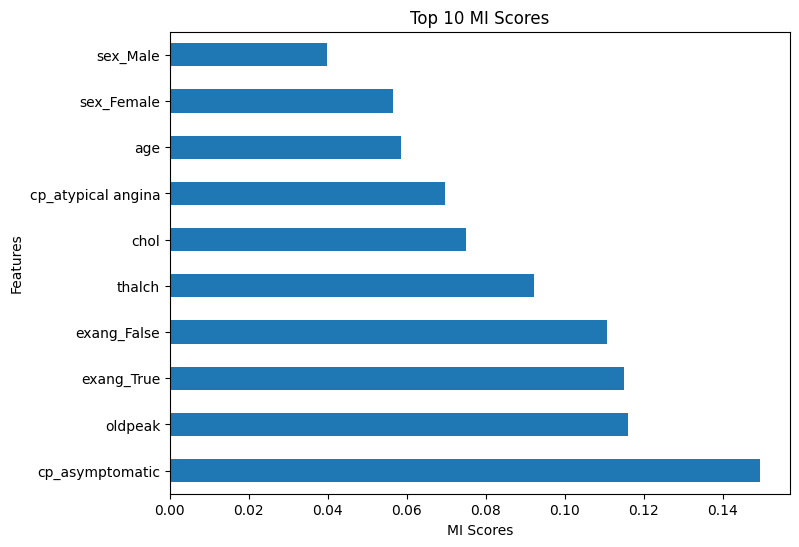

In [60]:
top_10_mi_scores = mi_scores.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
top_10_mi_scores.plot(kind='barh')
plt.xlabel("MI Scores")
plt.ylabel("Features")
plt.title("Top 10 MI Scores")

plt.show()

In [ ]:
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
